# Air pressure system failure prediction SCANIA  trucks

In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## importing data

In [2]:
data_path = os.path.join(os.getcwd(),'data')

In [3]:
train_path = os.path.join(data_path,'aps_failure_training_set.csv')
test_path = os.path.join(data_path,'aps_failure_test_set.csv')

In [4]:
train_set = pd.read_csv(train_path)
train_set

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


## Data is imbalanced POS class has only 1000 counts

In [5]:
train_set['class'].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

## Checking duplicates

In [6]:
train_set.duplicated().sum()

0

## Nan values are represented by 'na' so replacing it by np.nan

In [7]:
train_set.replace('na',np.nan,inplace=True)

## Checking the distribution of nan value per column

In [8]:
null_count = train_set.isnull().sum()

<BarContainer object of 25 artists>

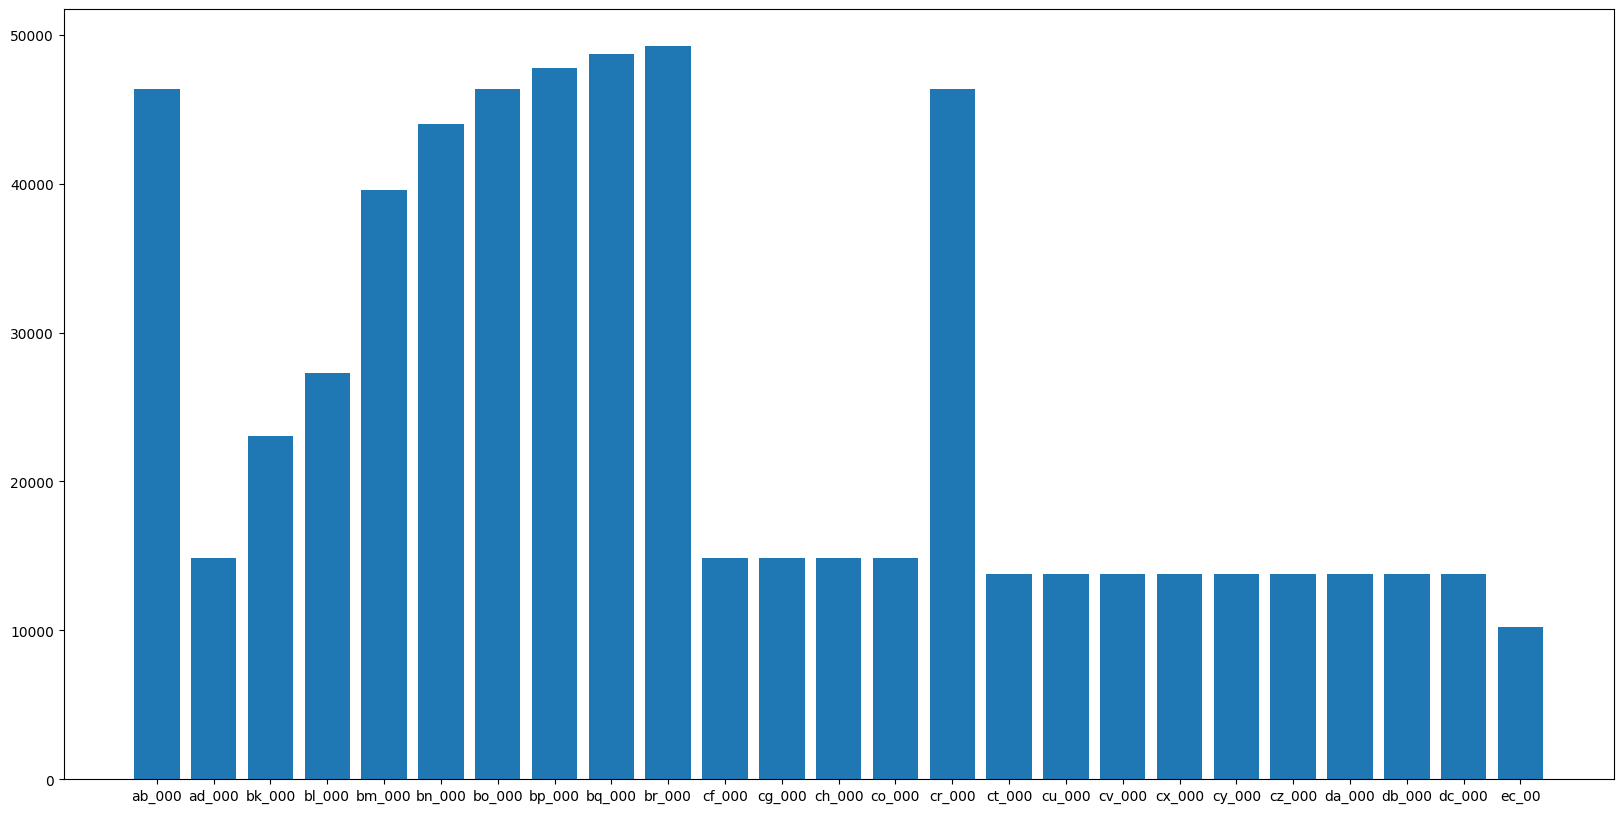

In [9]:
plt.figure(figsize=(20,10))
plt.bar(height =null_count[null_count>10000],x=null_count[null_count>10000].index)

## Dropping columns which have greater than 70% nan values

In [10]:
drop_col = null_count[null_count>42000].index
drop_col

Index(['ab_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000'], dtype='object')

In [11]:
train_set.drop(columns=drop_col,inplace=True)

In [12]:
train_set.shape

(60000, 164)

## Dividing Continous and discrete values 

In [13]:
x = train_set.iloc[:,1:]
# x.columns
y = train_set['class']
# y

In [14]:
def segregate_cols(x):
    cont = []
    dis = []
    obj = []
    for cols in x.columns:
        try : 
            x[cols]=pd.to_numeric(x[cols])
            if (x[cols]%1>0).any():
                cont.append(cols)
            else:
                dis.append(cols)
        except:
                obj.append(cols)

    return cont,dis,obj

In [15]:
cont,dis,obj = segregate_cols(x)

In [16]:
obj

[]

In [17]:
cont_set = train_set[cont]

dis_set = train_set[dis]

## Imputing the missing values

In [18]:
cont_set.isna().sum()

bt_000      167
ci_000      338
cj_000      338
ck_000      338
ec_00     10239
dtype: int64

In [19]:
dis_set.isna().sum()

aa_000        0
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 158, dtype: int64

In [20]:
cont_set

,bt_000,ci_000,cj_000,ck_000,ec_00
0,76698.08,5245752,0,916567.68,2445.8
1,33057.51,2291079.36,0,643536.96,2211.76
2,41040.08,2322692.16,0,236099.52,1018.64
3,12.69,2135.04,0,4525.44,1.08
4,60874.03,3565684.8,0,379111.68,1116.06
...,...,...,...,...,...
59995,153001.45,8289544.32,0,1529548.8,2912.04
59996,2285.92,123344.64,0,11387.52,80.4
59997,112.49,7518.72,4221.12,10493.76,2.76
59998,80292.76,4776505.92,106006.08,1048805.76,1659.7


## checking skewness of continous and discrete columns

In [21]:
cont_set.skew(skipna=True).values


array([6.118994356901087, 5.836331522733422, 22.10617671646724,
       8.780390814584287, 9.785267561955981], dtype=object)

In [22]:
dis_set.skew(skipna=True).values

array([6.115752483633429, 1.784844845141587, 212.45940566804606,
       90.5882523671592, 51.671769825159885, 153.3875546680978,
       76.07604880871378, 37.02622150653619, 23.787915949905322,
       22.292290128815015, 9.139142511044623, 8.272126008163475,
       12.37836491872851, 35.67965585203641, 98.28898879372306,
       5.534549192024902, 47.45265149902943, 75.07573107226116,
       113.62549665817274, 28.89295128246403, 28.36139997235212,
       5.568640359723724, 5.668929156683823, 7.807262184400477,
       7.87783819933435, 27.902211617017873, 111.73242770313877,
       57.31679458410669, 108.98780911664761, 47.13358323072948,
       21.808876073803805, 59.621485638357214, 102.41575771942146,
       53.64007677459333, 40.19520106514795, 63.50932194926727,
       39.04176615727337, 12.796322263701164, 21.47072525559567,
       9.657899076456031, 159.06683678538678, 69.34748490646741,
       58.303988913527114, 86.76353513870349, 32.66392811806339,
       8.721882727355187, 12

## segregate categorical values from discrete variables

- segregating by 25th quantile any number of unique values less than 25th quantile of unique values

In [60]:
def seg_cat(discrete):
    unq = []

    for col in discrete.columns:
        unq.append(len(discrete[col].unique()))

    unq = np.array(unq)
    
    cutoff_unq = np.quantile(unq,[0.25])
    print(cutoff_unq)

    cat = []
    for col in discrete.columns:
       if len(discrete[col].unique()) < cutoff_unq:
           cat.append(col)
    return cat

In [62]:
cat_cols = seg_cat(dis_set)

[1791.25]


In [63]:
len(cat_cols)

40

## imputing categorical with mode and numerical with median